# Telco custumer churn

In [1]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

## Download/Load dataset

In [2]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn",force_download=False)
print("Files:", os.listdir(path))

Files: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [3]:
df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes


In [5]:
df.shape

(7043, 21)

## Clean data

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

**Note:** totalcharges and churn are objects

### No NaN missing values (totalcharges)

In [8]:
#pd.to_numeric(df.totalcharges)
df.totalcharges.iloc[488]

'_'

In [9]:
tc = pd.to_numeric(df.totalcharges, errors="coerce")
tc.isna().sum().item()

11

In [10]:
df[tc.isna()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [11]:
df.totalcharges = tc
df.totalcharges[488]

np.float64(nan)

### Fill nan values

We choose fill with 0, but this may be not the better option

In [12]:
df.totalcharges = df.totalcharges.fillna(0)
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Separate categorical and numeriacl variables

#### String

In [13]:
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"first 5: {df[col].unique()[:5]}")
    print()

customerid: 7043 unique values
first 5: ['7590-vhveg' '5575-gnvde' '3668-qpybk' '7795-cfocw' '9237-hqitu']

gender: 2 unique values
first 5: ['female' 'male']

partner: 2 unique values
first 5: ['yes' 'no']

dependents: 2 unique values
first 5: ['no' 'yes']

phoneservice: 2 unique values
first 5: ['no' 'yes']

multiplelines: 3 unique values
first 5: ['no_phone_service' 'no' 'yes']

internetservice: 3 unique values
first 5: ['dsl' 'fiber_optic' 'no']

onlinesecurity: 3 unique values
first 5: ['no' 'yes' 'no_internet_service']

onlinebackup: 3 unique values
first 5: ['yes' 'no' 'no_internet_service']

deviceprotection: 3 unique values
first 5: ['no' 'yes' 'no_internet_service']

techsupport: 3 unique values
first 5: ['no' 'yes' 'no_internet_service']

streamingtv: 3 unique values
first 5: ['no' 'yes' 'no_internet_service']

streamingmovies: 3 unique values
first 5: ['no' 'yes' 'no_internet_service']

contract: 3 unique values
first 5: ['month-to-month' 'one_year' 'two_year']

paperlessbi

#### Numerical

In [14]:
for col in df.select_dtypes(exclude=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"first 5: {df[col].unique()[:5]}")
    print()

seniorcitizen: 2 unique values
first 5: [0 1]

tenure: 73 unique values
first 5: [ 1 34  2 45  8]

monthlycharges: 1585 unique values
first 5: [29.85 56.95 53.85 42.3  70.7 ]

totalcharges: 6531 unique values
first 5: [  29.85 1889.5   108.15 1840.75  151.65]



### Categorical

In [15]:
categorical = df.select_dtypes(include=["object"]).columns.tolist()
categorical.remove('customerid')
categorical.append('seniorcitizen')
categorical

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn',
 'seniorcitizen']

In [16]:
df[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
churn               2
seniorcitizen       2
dtype: int64

### Numerical

In [17]:
numerical = df.select_dtypes(exclude=["object"]).columns.tolist()
numerical.remove('seniorcitizen')
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [18]:
df[numerical].nunique()

tenure              73
monthlycharges    1585
totalcharges      6531
dtype: int64

#### Convert churn to numerical

In [19]:
df.churn = df.churn.map({'yes':1, 'no':0})
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## Setting up the validation framework

In [20]:
val_size = 0.2
test_size = 0.2
df_full_train,df_test = train_test_split(df, test_size=test_size, random_state=1)
df_train,df_val = train_test_split(df_full_train, test_size=val_size/(1-test_size), random_state=1)

In [70]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [71]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Extract target values

In [72]:
targets = []
for df in (df_train, df_val, df_test):
    df.reset_index(drop=True, inplace=True)
    target = df.churn.values
    del df['churn']
    targets.append(target)
    

In [73]:
df_train.head().T

,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


In [74]:
y_train, y_val, y_test = targets

## Eploratory Data Analysis (EDA)

In [75]:
df_full_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerid,5634,5634,5442-pptjy,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5634,2,male,2838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,5634.0,NaN,NaN,NaN,0.161874,0.368368,0.0,0.0,0.0,0.0,1.0
partner,5634,2,no,2932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,5634,2,no,3968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5634.0,NaN,NaN,NaN,32.277955,24.555211,0.0,9.0,29.0,55.0,72.0
phoneservice,5634,2,yes,5087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,5634,3,no,2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,5634,3,fiber_optic,2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,5634,3,no,2801,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Look at the target variable

In [76]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

### Feature importance
Feature importance analysis (part of EDA) - identifying which features affect our target variable
* churn rate
* risk ratio
* Mutual information

#### Churn rate and risk

In [77]:
categorical_features = categorical.copy()
categorical_features.remove('churn')
for c in categorical_features:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean']  - df_full_train.churn.mean()
    df_group['risk'] = df_group['mean'] / df_full_train.churn.mean()
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


Note that partner variable modifies the churn ratio more than gender so it is more important for predicting churn.

#### Mutual Information 

Measure the shared information between variables ([wikipedia](https://en.wikipedia.org/wiki/Mutual_information))

$$
\begin{align*}
H(X \Cap Y) &= H(Y) - H(Y \mid X),\\
&=H(X)+H(Y)-H(X,Y),\\
& =  D_{KL}\!\left( p_{(X,Y)} \,\|\|\, p_X p_Y \right)
\end{align*}
$$


In [78]:
categorical_map={}
df_num = df_full_train.copy()
for col in categorical:
    classes=df_full_train[col].unique()
    cat_map = dict(zip(classes, range(len(classes))))
    df_num[col] = df_full_train[col].map(cat_map)
    categorical_map[col] = cat_map

df_num.T

,1814,5946,3881,2389,3676,611,588,2687,1550,2890,...,4225,144,5056,2895,2763,905,5192,3980,235,5157
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom,4765-oxppd,0742-lafqk,5213-twwju,9957-yodkz,1732-vhubq,...,5345-bmkwb,1131-qqzeb,3262-eidhv,7446-sfaoa,2250-ivbwa,0781-lkxbr,3507-gasnp,8868-wozgu,1251-krreg,5840-nvdcg
gender,0,1,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
seniorcitizen,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
partner,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
dependents,0,1,1,0,1,0,1,1,1,0,...,1,1,0,1,0,1,0,1,1,0
tenure,12,42,71,71,30,9,72,28,6,47,...,8,71,72,37,64,9,60,28,2,16
phoneservice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
multiplelines,0,0,1,1,0,0,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0
internetservice,0,1,1,1,1,1,2,2,2,2,...,0,0,1,0,2,2,0,2,1,1
onlinesecurity,0,1,1,1,1,1,1,2,2,2,...,0,0,1,0,1,2,0,2,2,1


In [79]:
mutual_info_score(df_num.contract, df_num.churn)

0.0983203874041556

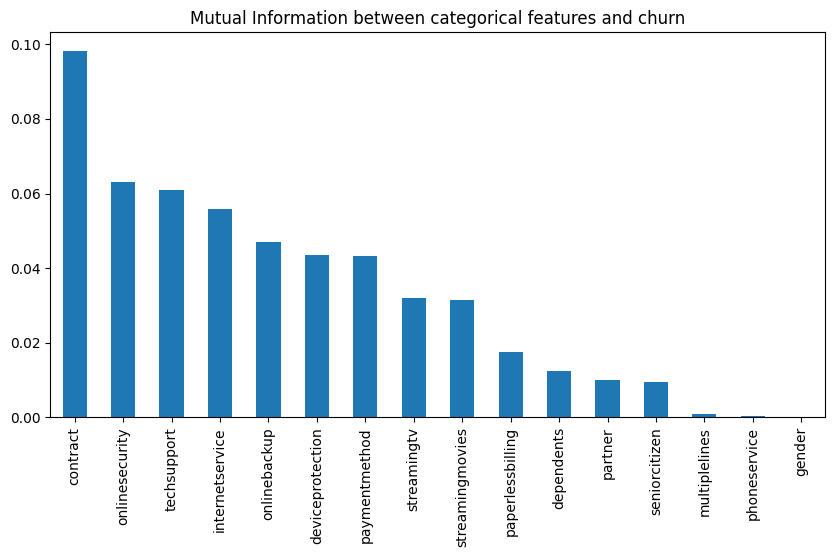

In [80]:
mi = df_num[categorical_features].apply(lambda c: mutual_info_score(df_num.churn,c))
mi.sort_values(ascending=False,inplace=True)
mi.plot.bar(figsize=(10,5),title="Mutual Information between categorical features and churn");

#### Mutual information (multiple varaibles)

Because of he sinergy effect $\mu^{*}(X\cap Y\cap Z) < 0$ 
    the three variables *together* reveal extra structure that is not present in any pair alone.
the predictability capability of features may increas when they are combined

In [81]:
from pyitlib import discrete_random_variable as drv
from collections import defaultdict
from itertools import combinations
import math

In [82]:
def H_joint(vars, base=2):
    return float(drv.entropy_joint(vars, base=base))

def H_cond(Y_vars,X_vars,  base=2):
    if not isinstance(Y_vars, (list, tuple)):
        Y_vars = [Y_vars]
    if not isinstance(X_vars, (list, tuple)):
        X_vars = [X_vars]
    return H_joint(X_vars + Y_vars, base=base) - H_joint(X_vars, base=base)


In [83]:
n= len(categorical_features)
y = df_num.churn.values

##### single

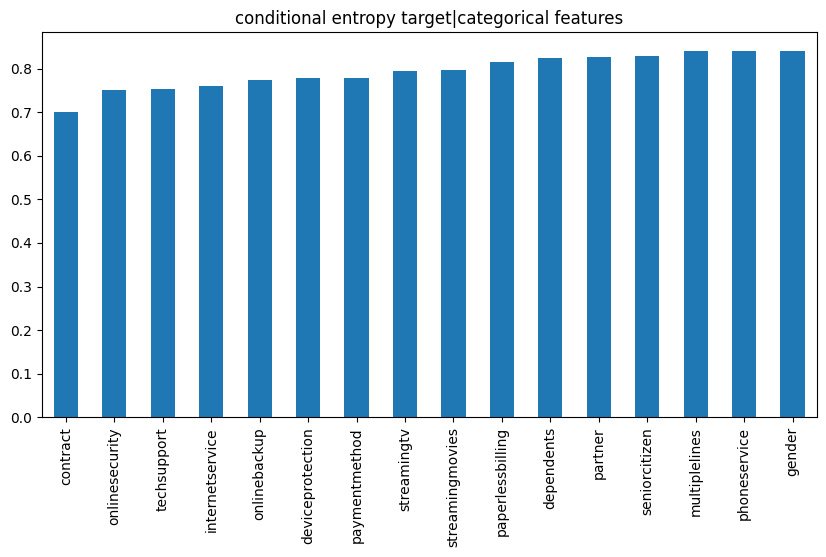

In [84]:
dep = df_num[categorical_features].apply(lambda c: H_cond(y,c))
dep.sort_values(inplace=True)
dep.plot.bar(figsize=(10,5),title="conditional entropy target|categorical features");

##### pairs

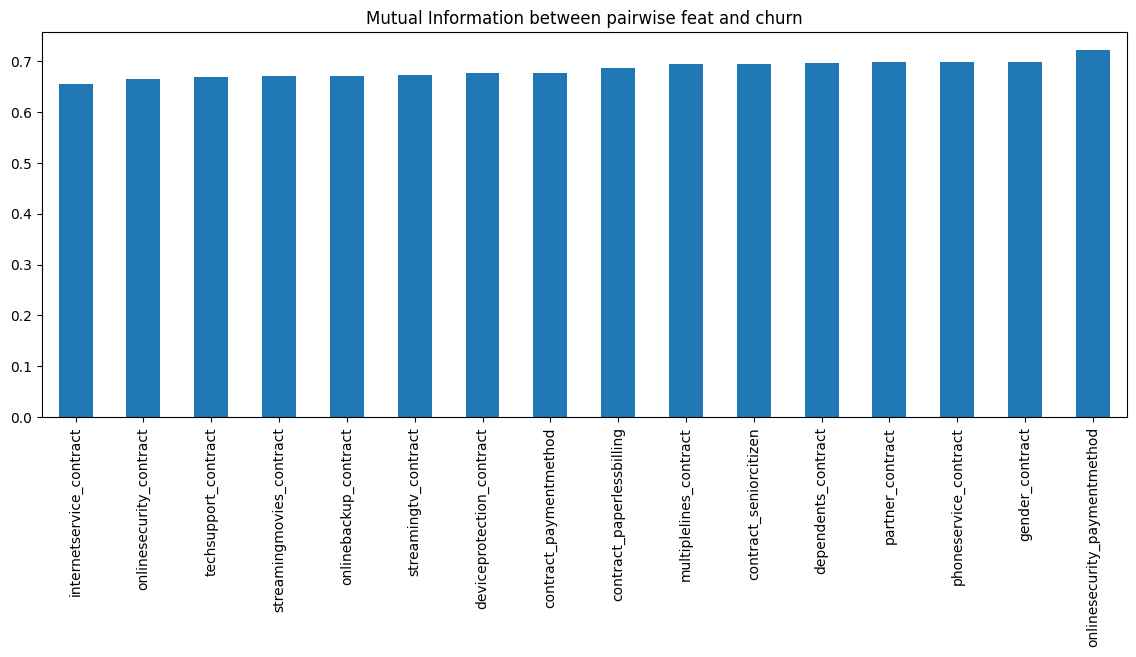

In [85]:
m=2
n_comb = math.comb(n, m)
cond_pair = pd.Series(dtype=float)
for cats in combinations(categorical_features, m):
    joint_col = "_".join(cats)
    X_list = [df_num[c].values for c in cats]
    cond_pair[joint_col] = H_cond(y,X_list)
cond_pair.sort_values(ascending=True,inplace=True)
cond_pair.iloc[:n].plot.bar(figsize=(14,5),title="Mutual Information between pairwise feat and churn");

In [86]:
feat_n = defaultdict(int)
best_feat = set()
for s in cond_pair.index[:n_comb//m]:
    feats = set(s.split("_"))
    for feat in feats:
        feat_n[feat]+=1
    if any(feat_n[f]>=n/m for f in feats):
        continue 
    best_feat = best_feat.union(feats)
    
best_feat

{'contract',
 'deviceprotection',
 'internetservice',
 'onlinebackup',
 'onlinesecurity',
 'partner',
 'paymentmethod',
 'streamingmovies',
 'streamingtv',
 'techsupport'}

##### triplets

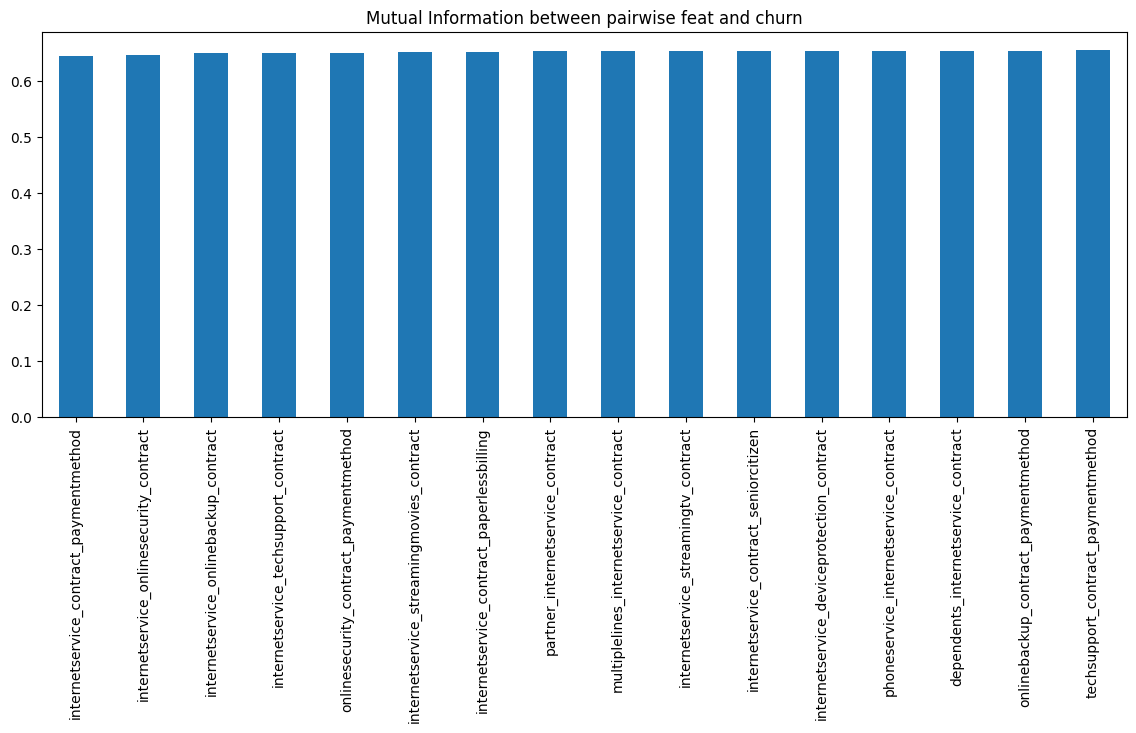

In [87]:
m=3
n_comb = math.comb(n, m)
cond_pair = pd.Series(dtype=float)
for cats in combinations(categorical_features, m):
    joint_col = "_".join(cats)
    X_list = [df_num[c].values for c in cats]
    cond_pair[joint_col] = H_cond(y,X_list)
cond_pair.sort_values(ascending=True,inplace=True)

cond_pair.iloc[:n].plot.bar(figsize=(14,5),title="Mutual Information between pairwise feat and churn");


In [88]:
feat_n = defaultdict(int)
best_feat = set()
for s in cond_pair.index[:n_comb//m]:
    feats = set(s.split("_"))
    for feat in feats:
        feat_n[feat]+=1
    if any(feat_n[f]>=n/m for f in feats):
        continue 
    best_feat = best_feat.union(feats)
    
best_feat

{'contract',
 'internetservice',
 'onlinebackup',
 'onlinesecurity',
 'paymentmethod',
 'techsupport'}

#### Correlation
 
The Pearson correlation coefficient (PCC) is a correlation coefficient that measures **linear** correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, [wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

$$
\begin{align*}
\rho_{X,Y} &= \frac{\operatorname{cov}(X,Y)}{\sigma_X\,\sigma_Y},\\[6pt]
\operatorname{cov}(X,Y) &= \mathbb{E}\!\left[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])\right],\\[6pt]
\sigma_X &= \sqrt{\mathbb{E}\!\left[(X - \mathbb{E}[X])^2\right]}.
\end{align*}
$$

| Category   | Condition on $\|\rho\| $       |
|------------|------------------------------|
| Low        | $\|\rho\| < 0.2 $              |
| Moderate   | $0.2 ≤ \|\rho\| < 0.5  $       |
| Strong     | $0.5 ≤ \|\rho\| ≤ 1 $          |

In [89]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [90]:
df_full_train[df_full_train.tenure <=2].churn.mean().item()

0.5953420669577875

In [91]:
df_full_train[(df_full_train.tenure >2)&(df_full_train.tenure <=12)].churn.mean().item()

0.3994413407821229

In [92]:
df_full_train[df_full_train.tenure >12].churn.mean().item()

0.17634908339788277

In [93]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


## One hot encoding

In [94]:
from sklearn.feature_extraction import DictVectorizer

In [95]:
train_dicts = df_train[categorical_features+numerical].to_dict(orient='records')
train_dicts

[{'gender': 'female',
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'seniorcitizen': 0,
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'seniorcitizen': 0,
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [96]:
# dicts_str = [{k: str(v) for k, v in d.items()} for d in dicts]

dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [98]:
dv.get_feature_names_out().tolist()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [99]:
X_train = dv.fit_transform(train_dicts)

In [100]:
X_train.shape

(4225, 45)

In [101]:
val_dicts = df_val[categorical_features+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)  

In [102]:
X_val.shape

(1409, 45)

## Training logistic regression with sklearn

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
def prepare_X(df_tran,df_val):
    dicts_train=df_tran.to_dict(orient='records')
    dicts_val = df_val.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(dicts_train)
    
    X_train = dv.transform(dicts_train)
    X_val = dv.transform(dicts_val)
    
    return X_train, X_val, dv

In [176]:
X_train, X_val, dv = prepare_X(df_train[categorical_features+numerical],df_val[categorical_features+numerical])

model = LogisticRegression(max_iter=10_000)
model.fit(X_train, y_train);

In [177]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [178]:
model.intercept_[0].round(3).item()

-0.045

In [179]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [180]:
print("          neg prob, pos prob")
pred = model.predict_proba(X_val)[:,1]
((pred > 0.5).astype(int) == y_val).mean().item()

          neg prob, pos prob


0.8034066713981547

## Model Interpretation

In [181]:
dict(zip(dv.get_feature_names_out().tolist(),model.coef_[0].round(3).tolist()))

{'contract=month-to-month': 0.685,
 'contract=one_year': 0.039,
 'contract=two_year': -0.682,
 'dependents=no': 0.056,
 'dependents=yes': -0.015,
 'deviceprotection=no': 0.114,
 'deviceprotection=no_internet_service': -0.16,
 'deviceprotection=yes': 0.087,
 'gender=female': 0.039,
 'gender=male': 0.002,
 'internetservice=dsl': -0.497,
 'internetservice=fiber_optic': 0.698,
 'internetservice=no': -0.16,
 'monthlycharges': -0.018,
 'multiplelines=no': -0.187,
 'multiplelines=no_phone_service': 0.066,
 'multiplelines=yes': 0.162,
 'onlinebackup=no': 0.117,
 'onlinebackup=no_internet_service': -0.16,
 'onlinebackup=yes': 0.084,
 'onlinesecurity=no': 0.285,
 'onlinesecurity=no_internet_service': -0.16,
 'onlinesecurity=yes': -0.084,
 'paperlessbilling=no': -0.161,
 'paperlessbilling=yes': 0.202,
 'partner=no': -0.045,
 'partner=yes': 0.086,
 'paymentmethod=bank_transfer_(automatic)': -0.052,
 'paymentmethod=credit_card_(automatic)': -0.003,
 'paymentmethod=electronic_check': 0.106,
 'paymen

In [182]:
small = ['contract','tenure','monthlycharges']

X_train_small, X_val_small, dv_small = prepare_X(df_train[small],df_val[small])

In [183]:
model_small = LogisticRegression(max_iter=10_000)
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [184]:
b_small = model_small.intercept_[0].round(3).item()
b_small

-2.478

In [185]:
w_small = model_small.coef_[0].round(3).tolist()
w_small

[0.971, -0.024, -0.948, 0.027, -0.036]

In [186]:
dict(zip(dv_small.get_feature_names_out().tolist(), w_small))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

## Using the model

In [187]:
X_train_full, X_test_full, dv_full = prepare_X(df_full_train[categorical_features+numerical],df_test[categorical_features+numerical])

In [188]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [189]:
(model.predict(X_test_full)==y_test).mean().item()

0.8097941802696949

In [203]:
customer_id =-1
dicts_test = df_test[categorical_features+numerical].to_dict(orient='records')
customer = dicts_test[customer_id]
customer

{'gender': 'female',
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'seniorcitizen': 0,
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [204]:
x_test=dv.transform([customer])
x_test.shape

(1, 45)

In [205]:
model.predict(x_test).item()

1

In [206]:
y_test[customer_id].item()

1